# Bank Loan Modeling
#### **Data Science Course - Assignment 1** <br><br>

*Mohammad Hossein Malekpour | 9613425<br>
mohmmadhossein.malkepour@gmail.com*<br><br>

**GitHub:**   <br><br>

The beginning of each cell is commented why I am doing that part.<br>
After each part I explained with a red arrow what I understood from that part.<br>
<br>
________________________________________

# 1. Import Necessary Modules

In [1]:
# !pip install pandas-profiling
# !pip install xgboost

In [2]:
# Load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 
from pandas_profiling import ProfileReport

# Misc libraries
import random
import time

# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix ,classification_report

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
%config InlineBackend.figure_format='retina'

import warnings 
warnings.filterwarnings('ignore')

# 2. Load and Read Data

In [3]:
# Loading data into Pandas

data_raw = pd.read_csv('train_data.csv')
data_val = pd.read_csv('train_data.csv')
data = data_raw.copy()

In [4]:
# Preview Data

data_raw.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2007,1835,41,16,23,94143,2,0.3,2,118,0,0,0,0,0
1507,4155,51,25,163,94305,2,1.3,3,0,1,0,0,1,0
2185,801,31,7,173,91040,1,6.0,1,0,0,0,0,1,0
4370,2972,52,25,43,91380,3,1.0,2,165,0,0,1,1,1
1363,1111,58,33,34,92028,3,0.2,1,83,0,0,0,1,0
3034,1636,49,24,70,91330,1,2.9,1,0,0,0,0,0,0
4254,2401,61,36,169,91380,2,6.1,3,106,1,0,1,1,1
673,469,34,10,21,92634,1,0.5,3,0,0,0,0,1,0
4085,1046,43,18,84,92096,1,4.0,3,0,0,0,0,0,0
2340,1066,25,1,113,90401,3,2.5,1,0,0,0,0,0,1


# 3. Exploratory Data Analysis


#### **Columns:**

**ID**: Customer ID<br>
**Age:** Customer's age in completed years<br>
**Experience:** Number of years of professional experience<br>
**Income:** Annual income of the customer<br>
**ZIP Code:** Home Address ZIP code.<br>
**Family:** Family size of the customer<br>
**CCAvg:** Avg. spending on credit cards per month<br>
**Education:** Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br>
**Mortgage:** Value of house mortgage if any. <br>
**Personal Loan:** Did this customer accept the personal loan offered in the last campaign?<br>
**Securities Account:** Does the customer have a securities account with the bank?<br>
**CD Account:** Does the customer have a certificate of deposit (CD) account with the bank?<br>
**Online:** Does the customer use internet banking facilities?<br>
**CreditCard:** Does the customer use a credit card issued by this Bank?<br>

In [5]:
# Generates HTML profile reports from a pandas DataFrame (path: ./raw_data_report.html)

profile = ProfileReport(data, title='Bank Loan Modeling', explorative=True)
profile.to_file("raw_data_report.html")

In [6]:
# Print a concise summary of a DataFrame

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4500 non-null   int64  
 1   Age                 4500 non-null   int64  
 2   Experience          4500 non-null   int64  
 3   Income              4500 non-null   int64  
 4   ZIP Code            4500 non-null   int64  
 5   Family              4500 non-null   int64  
 6   CCAvg               4500 non-null   float64
 7   Education           4500 non-null   int64  
 8   Mortgage            4500 non-null   int64  
 9   Personal Loan       4500 non-null   int64  
 10  Securities Account  4500 non-null   int64  
 11  CD Account          4500 non-null   int64  
 12  Online              4500 non-null   int64  
 13  CreditCard          4500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 492.3 KB


 #### <font color='red'>🠊 We don't have any missing value.</font> <br><br>

In [7]:
# Check target value

data['Personal Loan'].value_counts()

0    4072
1     428
Name: Personal Loan, dtype: int64

#### <font color='red'>🠊 Dataset is skewed (imbalanced).</font> <br><br>

In [8]:
# Generate descriptive statistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4500.0,2509.383333,1443.917459,1.0,1257.75,2511.5,3770.25,5000.0
Age,4500.0,45.330667,11.478828,23.0,35.00,45.0,55.00,67.0
Experience,4500.0,20.109333,11.483496,-3.0,10.00,20.0,30.00,43.0
Income,4500.0,73.709778,46.061299,8.0,39.00,63.0,99.00,224.0
ZIP Code,4500.0,93169.384444,1758.566077,90005.0,91950.00,93448.5,94608.00,96651.0
Family,4500.0,2.402444,1.145764,1.0,1.00,2.0,3.00,4.0
CCAvg,4500.0,1.939869,1.752351,0.0,0.70,1.5,2.50,10.0
Education,4500.0,1.882000,0.840509,1.0,1.00,2.0,3.00,3.0
Mortgage,4500.0,56.579556,101.451763,0.0,0.00,0.0,101.00,635.0
Personal Loan,4500.0,0.095111,0.293401,0.0,0.00,0.0,0.00,1.0


#### <font color='red'>🠊 Column 'Experience' has negative values</font> <br><br>

In [9]:
# Count 'Experience' negative values

data[data['Experience'] < 0].Experience.count()

48

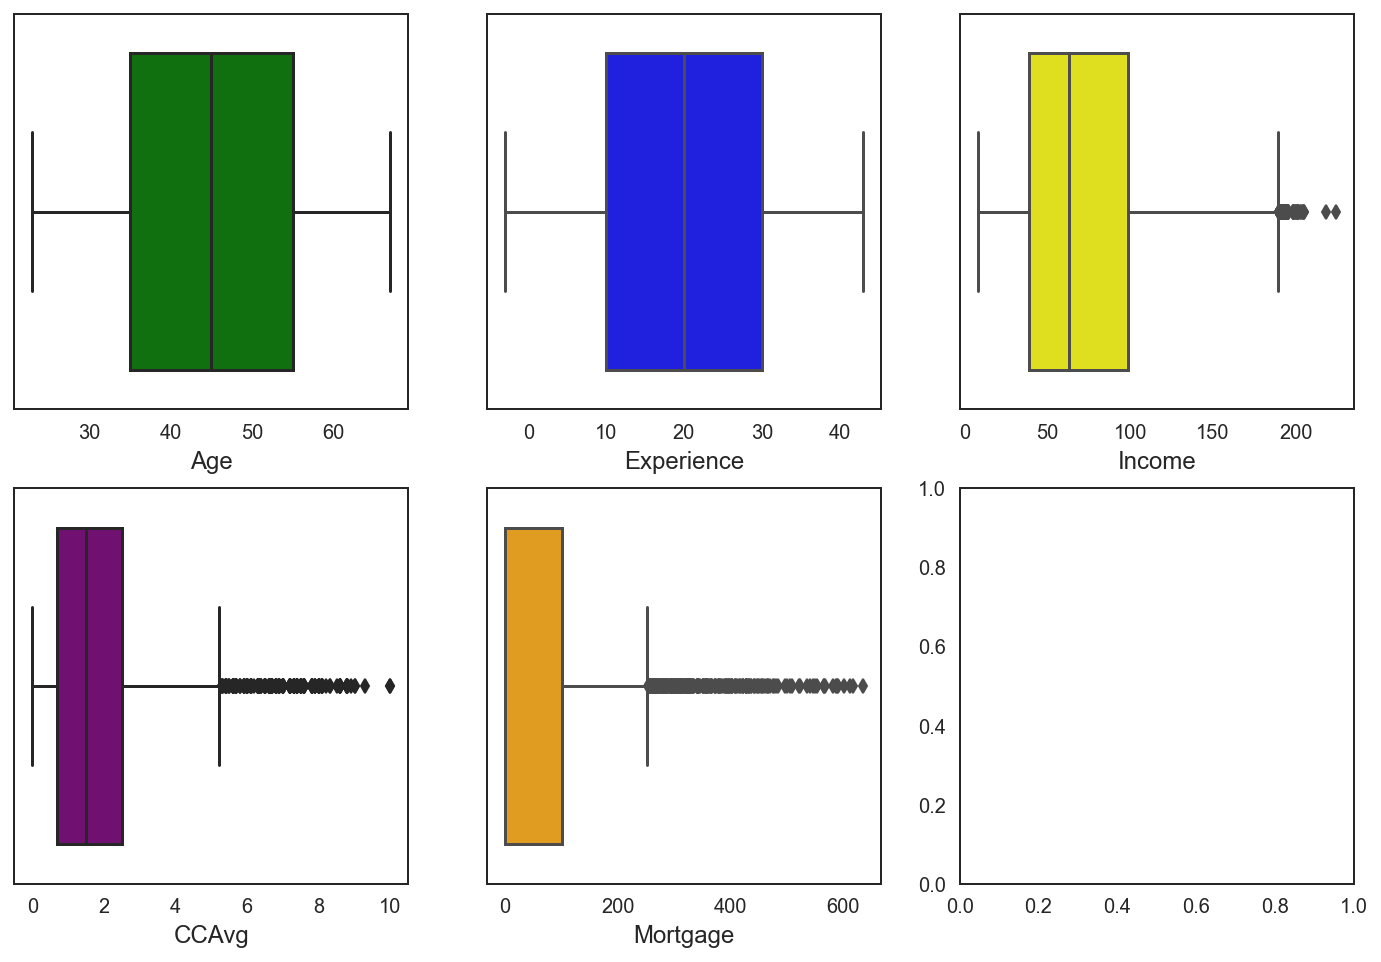

In [10]:
# Draw a box plot to show distributions of the continuous variables.

fig, ax = plt.subplots(2,3)
continuous_vars = ['Age','Experience','Income','CCAvg','Mortgage']
colors = ['green', 'blue', 'yellow', 'purple', 'orange']
i = 0
for var, c in zip(continuous_vars, colors):
    sns.boxplot(x=var, data=data, color=c, ax=ax[i//3,i%3])
    i += 1

#### <font color='red'>🠊 Age and Experience feature is normally distributed. </font>
<font color='red'>(Age: majority between 35 and 55 years)<br>
(Experience: majority between 10 to 30 years)</font>

#### <font color='red'>🠊 Most peaple have a mortgage of less than 40K and the max value is 635K. </font>
#### <font color='red'>🠊There are lots of outliers in the monthly income, CCAvg and Mortagage. </font>

 <br><br>

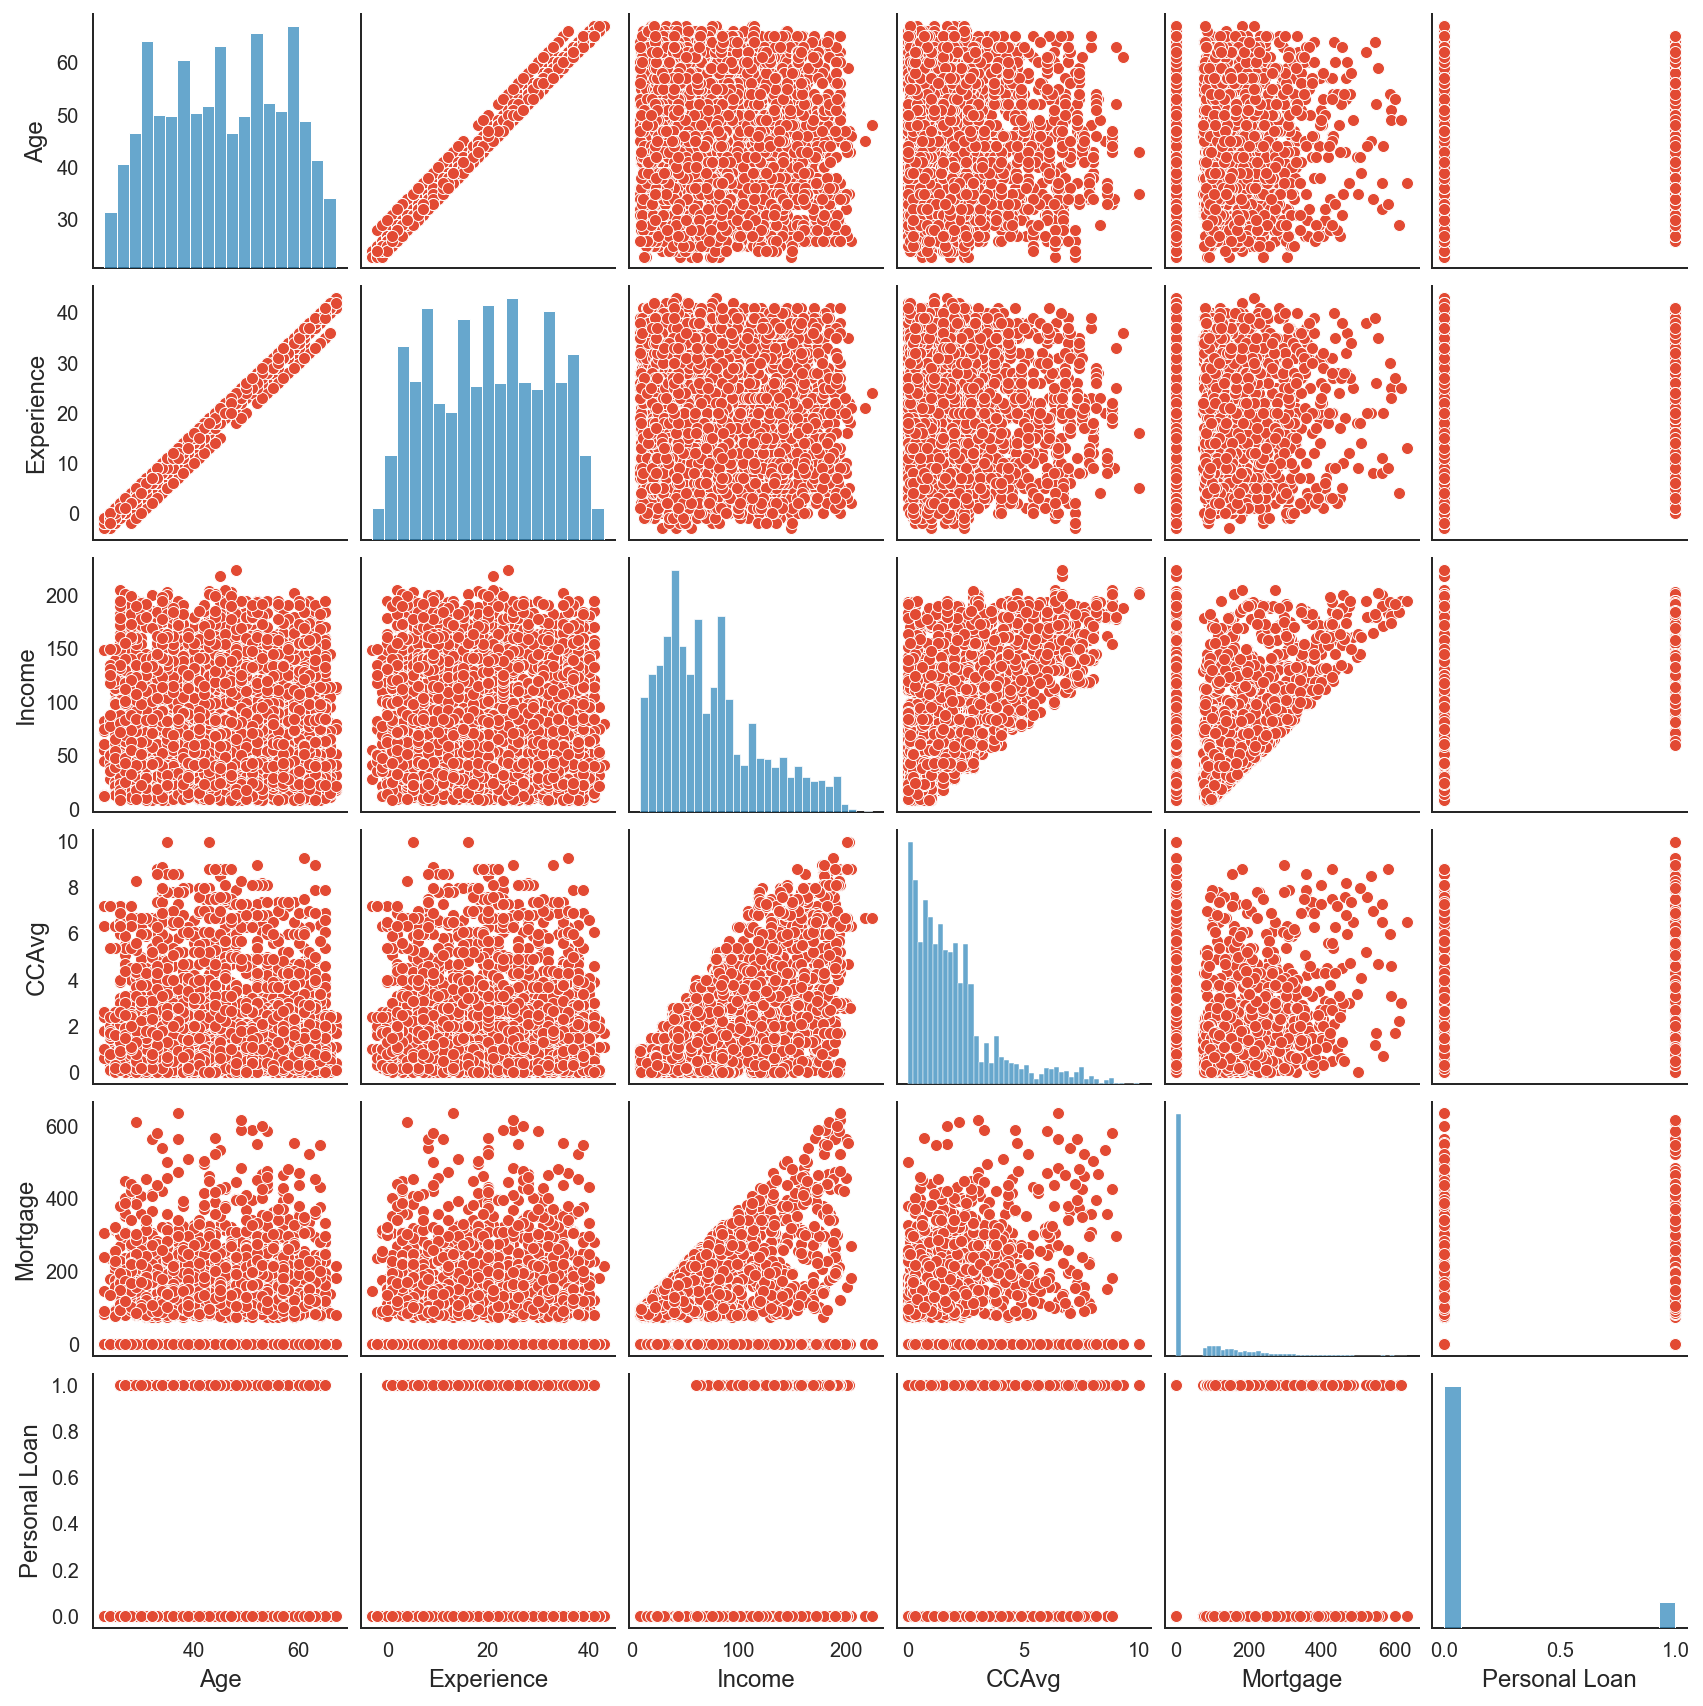

In [11]:
# Plot pairwise relationships in a dataset

tmp = data[['Age','Experience','Income','CCAvg', 'Mortgage', 'Personal Loan']]
sns.pairplot(data=tmp, height=2)

 #### <font color='red'>🠊 Income, CCAverage and Mortgage are skewed. we will use log transform to remove skewness from the predictor.
 #### <font color='red'>🠊 Age is highly correlated with Experience. so we will drop one of them.</font> 
 <br><br>

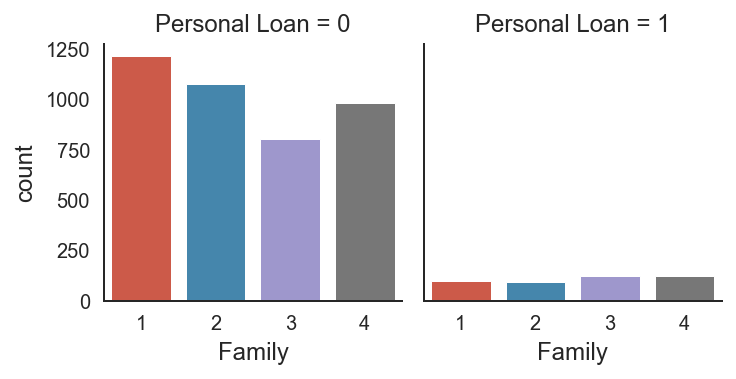

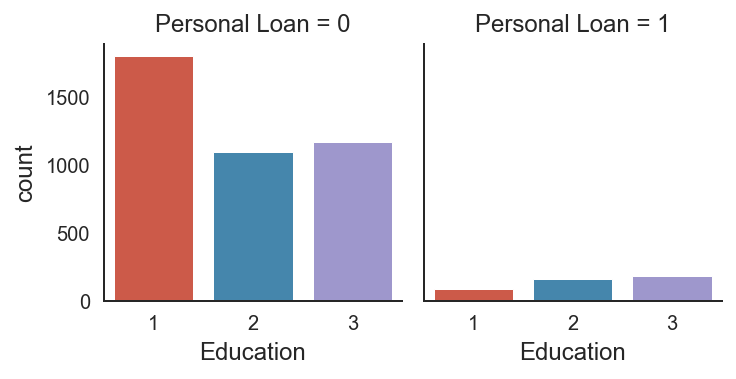

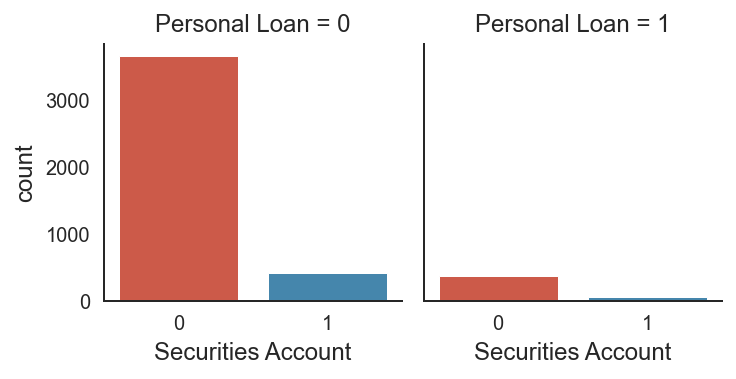

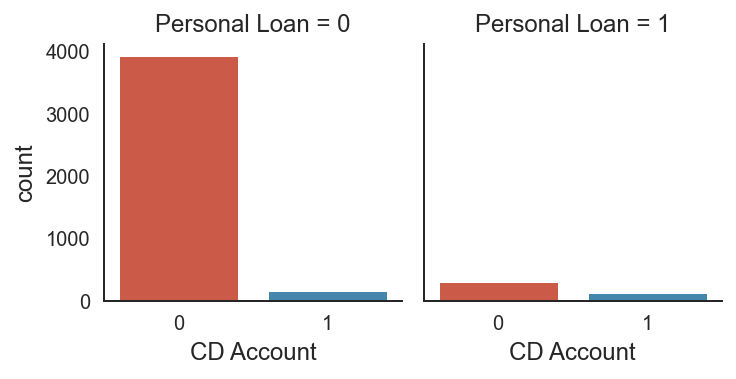

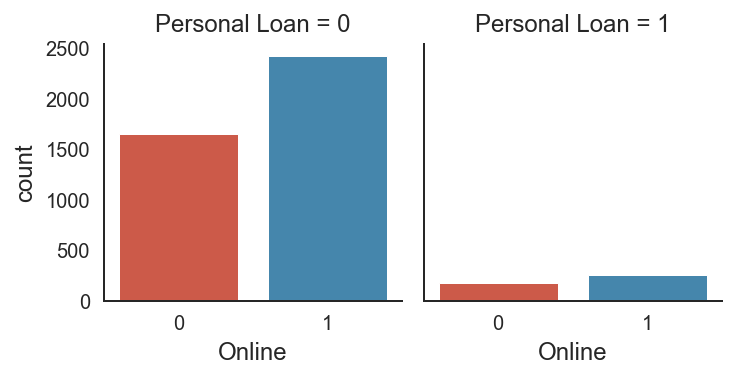

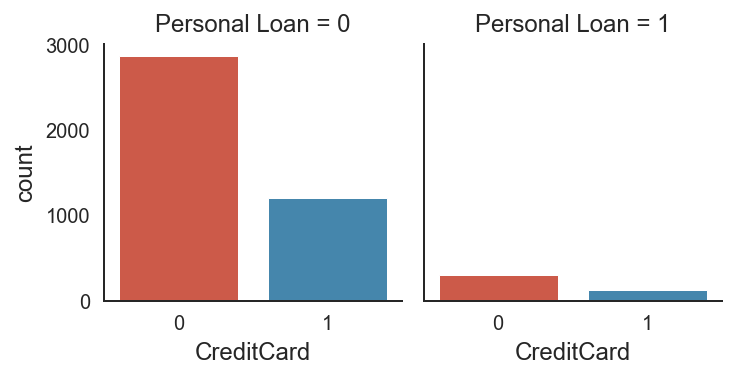

In [12]:
# Show the counts of target 'Personal Loan' in each categorical bin using bars.

categorical_vars = ['Family','Education','Securities Account','CD Account','Online','CreditCard']
for var in categorical_vars:
    sns.catplot(x=var, col='Personal Loan', kind='count', data=data, height=2.5)

 #### <font color='red'>🠊 Families (n>=2), people who use online services, clients who have securities<br> accounts and people who are not students are more likely to use **personal loans**.</font> <br><br>

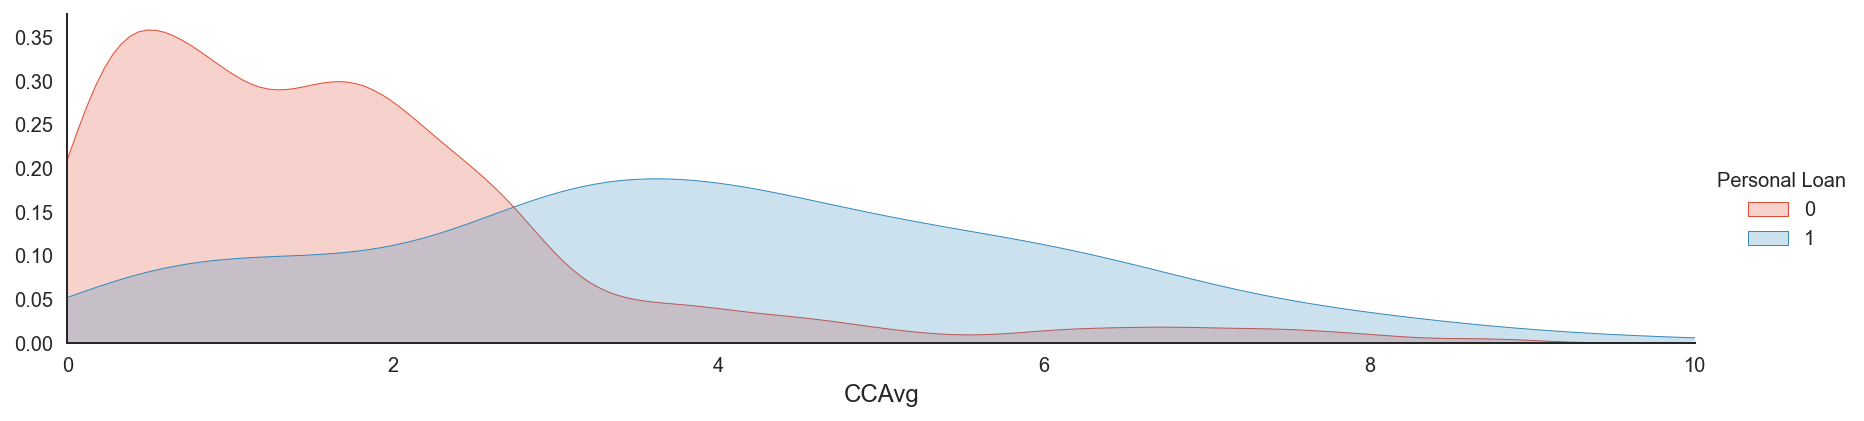

In [13]:
#plot distributions of age of passengers who survived or did not survive

a = sns.FacetGrid(data, hue = 'Personal Loan', aspect=4)
a.map(sns.kdeplot, 'CCAvg', shade= True )
a.set(xlim=(0 , data['CCAvg'].max()))
a.add_legend()

persons who have personal loan have a higher credit card average. 

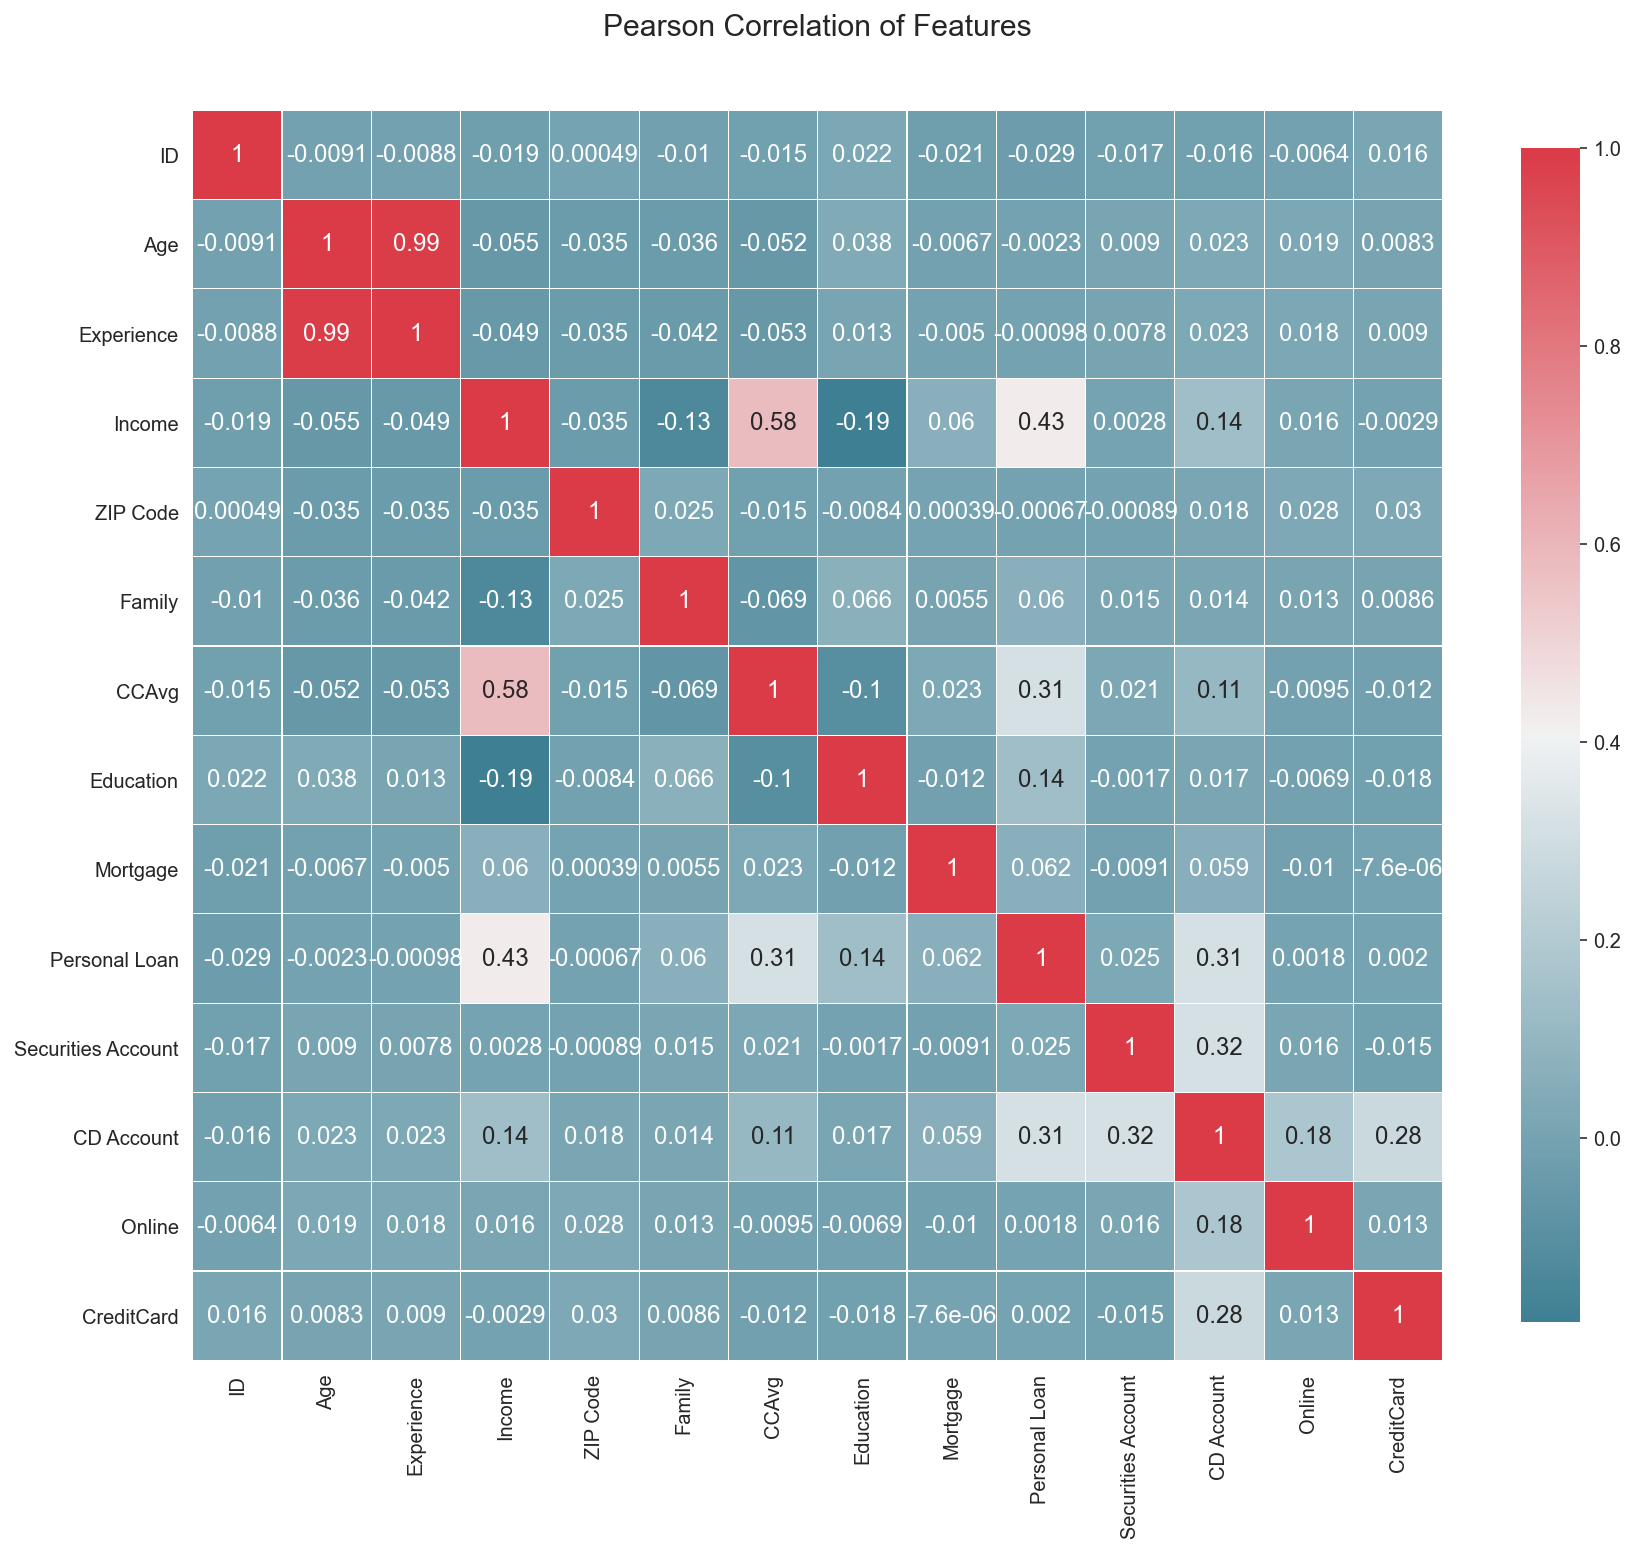

In [14]:
# correlation heatmap show which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems.

def correlation_heatmap(df, type):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method=type), #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data, 'spearman')

#### <font color='red'>🠊 Income and CCAverage has some correlation with Personal Loan.</font>
#### <font color='red'> 🠊 As mentioned before Age and Experience is highly correlated. And the rest of the relations are clear in the graph!</font> <br><br>


In [15]:
# Check 'ZIP Code' column

data['ZIP Code'].value_counts()

94720    146
94305    113
95616    104
90095     64
93106     53
        ... 
96145      1
90016      1
91024      1
90068      1
94965      1
Name: ZIP Code, Length: 463, dtype: int64

In [16]:
data['ZIP Code'] = data['ZIP Code'].astype(str)
data['ZIP Code'].str[0:2].value_counts()

94    1327
92     895
95     736
90     640
91     490
93     379
96      33
Name: ZIP Code, dtype: int64

#### <font color='red'>🠊 It's categorical data (in numerical appearance) and most of category hasn't enough sample! We will separate with the first two digits to minimize categories.

# 4. Data Wrangling and Cleaning 

### 4.1 Correcting:

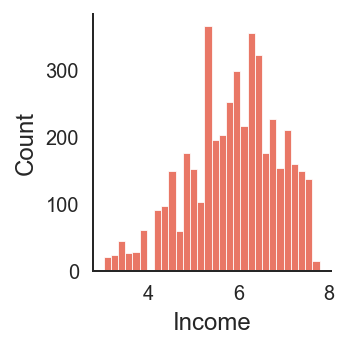

In [17]:
# Drop negetive values of 'Experience'
data[data['Experience'] < 0].Experience.count()
data.drop(data[data['Experience'] < 0].index, inplace=True)


# Drop 'ID' and 'Age' columns (Age and Experience are highly correlated)
data.drop('Age', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)


# Log transformationo to remove skewness from 'Income'
data['Income'] = np.log2(data['Income'])
sns.displot(data, x="Income", height=2.5)

### 4.2 Create: Feature Engineering

In [18]:
# Discrete variables
data['IsAlone'] = 1
data['IsAlone'].loc[data['Family'] > 1] = 0 # now update to no/0 if family size is greater than 1


# Age Bins using cut bins
data['Experience'] = pd.cut(data['Experience'].astype(int), 5)
label = LabelEncoder()
data['Experience'] = label.fit_transform(data['Experience'])


# separate 'ZIP Code' with the first two digits to minimize categories
data['ZIP Code'] = data['ZIP Code'].str[0:2]

### 4.3 Covert Format

In [19]:
# Code categorical data
label = LabelEncoder()
data['Experience'] = label.fit_transform(data['Experience'])
data['ZIP Code'] = label.fit_transform(data['ZIP Code'])

In [20]:
# Convert categorical variable into dummy/indicator variables
zip_dummies = pd.get_dummies(data['ZIP Code'], prefix='zip')
data = pd.concat([data, zip_dummies], axis=1)

In [21]:
# Preview Data

data.sample(5)

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,IsAlone,zip_0,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6
1835,1,5.672425,3,3,2.1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3599,4,7.055282,0,1,2.6,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0
2874,3,4.392317,2,3,1.3,2,0,0,0,0,1,1,0,0,0,1,0,0,0,0
3091,3,6.392317,5,2,1.6,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1713,0,5.459432,5,1,0.2,3,0,0,0,0,1,0,1,0,0,0,0,0,1,0


# 5. Model Data

In [22]:
target = ['Personal Loan']
predictors = ['Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','IsAlone','zip_0','zip_1','zip_2','zip_3','zip_4','zip_5','zip_6']

In [23]:
# Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(), 
    ensemble.BaggingClassifier(), 
    ensemble.ExtraTreesClassifier(), 
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(), 
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(), #Good for discrete data
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #xgboost
    XGBClassifier()
    ]

In [24]:
# Split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

# Create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# Create table to compare MLA predictions
MLA_predict = data[target]

# Index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # Set name and parameters
    MLA_name = alg.__class__.__name__
    print(MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data[predictors], data[target], cv = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    # If this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    # Save MLA predictions
    alg.fit(data[predictors], data[target])
    MLA_predict[MLA_name] = alg.predict(data[predictors])
    
    row_index+=1

    
# Print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

AdaBoostClassifier
BaggingClassifier
ExtraTreesClassifier
GradientBoostingClassifier
RandomForestClassifier
GaussianProcessClassifier
LogisticRegressionCV
PassiveAggressiveClassifier
RidgeClassifierCV
SGDClassifier
Perceptron
BernoulliNB
GaussianNB
KNeighborsClassifier
SVC
LinearSVC
DecisionTreeClassifier
ExtraTreeClassifier
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
XGBClassifier
[19:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore 

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1,0.985329,0.0146286,0.271998
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.995994,0.984506,0.0106774,0.309405
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.998428,0.983982,0.0107784,0.0402057
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,0.982186,0.0101322,0.231685
16,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.980988,0.0119751,0.00989933
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1,0.966617,0.0139944,0.222393
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.975028,0.96512,0.00995143,0.147912
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.958742,0.954042,0.0132161,2.3041
15,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.951591,0.946257,0.0140519,0.136699
17,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.933159,0.0431237,0.00600414


Text(0, 0.5, 'Algorithm')

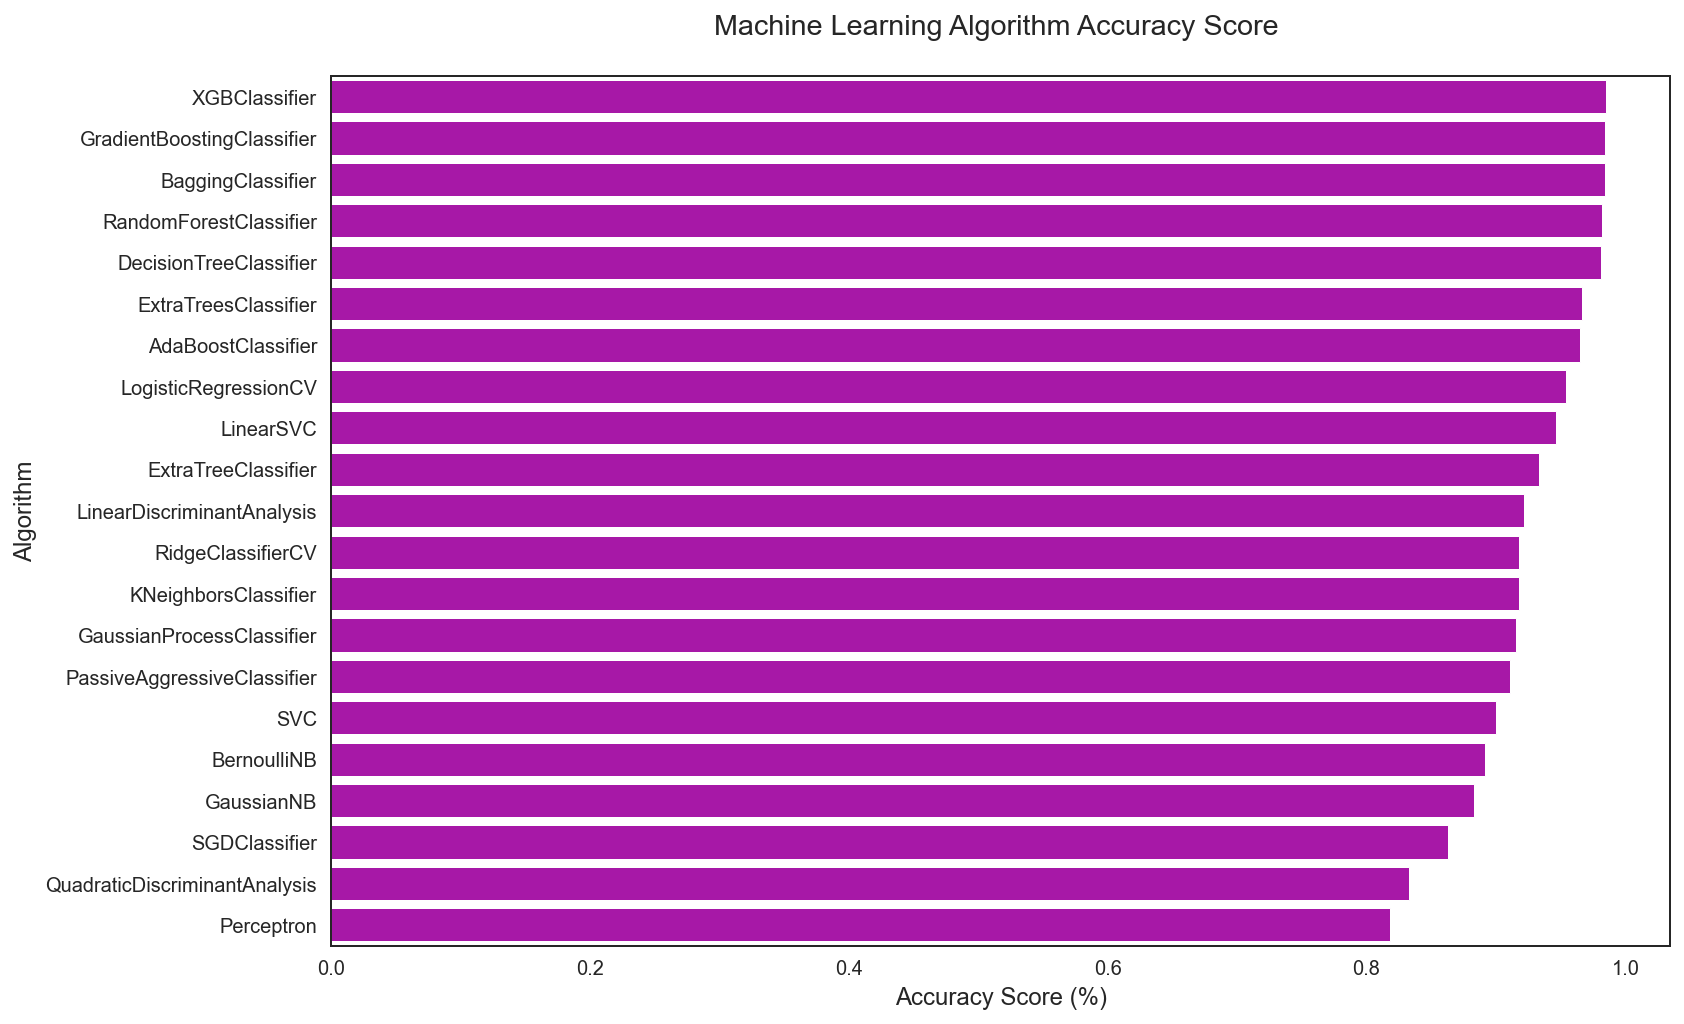

In [25]:
# Show MLA Test Accuracy Mean of above MLA by barplot
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

#### <font color='red'>🠊 As you can see the first 5 models have the very good Test Accuracy Mean and has a small standard deviation.<font>
#### <font color='red'> According to the need, we can use one of them in the product.<font>